# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import os
import json

twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
import requests

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [3]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

import json

page_no_exist = []
retweet_count_and_favorite_count = []

with open('tweet_json.txt', mode="w") as file:
    for i in list(twitter_archive.tweet_id):
        try:
            tweet = api.get_status(str(i))
            file.write(json.dumps(tweet._json))
            retweet_count_and_favorite_count.append({
                "tweet_id" : str(i),
                "retweet_count" : tweet._json['retweet_count'],
                "favorite_count" : tweet._json['favorite_count']
            })
        except:
            page_no_exist.append(i) 

Rate limit reached. Sleeping for: 748
Rate limit reached. Sleeping for: 745


In [4]:
retweet_count_and_favorite_count = pd.DataFrame(retweet_count_and_favorite_count, columns=["tweet_id",'retweet_count', 'favorite_count'])

In [5]:
retweet_count_and_favorite_count

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7009,33809
1,892177421306343426,5301,29331
2,891815181378084864,3481,22050
3,891689557279858688,7225,36937
4,891327558926688256,7760,35311
5,891087950875897856,2602,17811
6,890971913173991426,1663,10363
7,890729181411237888,15752,56863
8,890609185150312448,3620,24522
9,890240255349198849,6098,27959


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [6]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
sum(twitter_archive.duplicated())

0

In [9]:
sum(twitter_archive.source.duplicated())

2352

In [10]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [11]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
retweet_count_and_favorite_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null object
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.6+ KB


### Quality issues
1. Wrong data type for `timestamp`and `retweeted_status_timestamp`.

2. Rating denominator does not equal 10

3. Dogs without names given 'a' instead on None

4. Redundant rows in `in_reply..` rows

5. Redundant rows in `retweeted` rows

6. Wrong ratings for some tweets

7. In the image_predictions dataframe, some rows have 3 false predictions which might not be accurate

8. Wrong data type for `tweet_id` in retweet_count_and_favorite_count dataframe

### Tidiness issues
1. There are some redundant rows of the same category that is doggo,floofer,pupper and puppo

2. The retweet_count and favorite_count should be part of the twitter_archive dataframe

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [13]:
# Make copies of original pieces of data
twitter_clean = twitter_archive.copy()
image_pred_clean = image_predictions.copy()
retweet_favorite_clean = retweet_count_and_favorite_count.copy()

### QUALITY ISSUES

### Issue #1: Wrong data type for timestamp, retweeted_status_timestamp, retweeted_status_id and retweeted_status_user_id.

#### Define: We will change the data types for the columns with wrong data types

#### Code

In [14]:
#Convert timestamp from string to datetime
twitter_clean['timestamp'] = pd.to_datetime(twitter_clean['timestamp'])
twitter_clean['retweeted_status_timestamp'] = pd.to_datetime(twitter_clean['retweeted_status_timestamp'])

#### Test

In [15]:
#Check for the above changes
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime

### Issue #2:Rating denominator does not equal 10

#### Define: Find the rows with a denominator not equal to 10 and drop those rows

#### Code

In [16]:
#Get the rows to a list
not_ten=list(twitter_clean.query('rating_denominator != 10').index)
twitter_clean.drop(index=not_ten, inplace=True)

#### Test

In [17]:
twitter_clean.query('rating_denominator != 10').index

Int64Index([], dtype='int64')

### Issue #3:Dogs without names given 'a' instead on None

#### Define: Find the list or wrong dog names and replace with none

#### Code

In [18]:
wrong_dog_names = list(twitter_clean.query('name=="a" or name=="an"').index)

In [19]:
for i in wrong_dog_names:
    twitter_clean.name[i] = "None"

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Test

In [20]:
for i in wrong_dog_names:
    if twitter_clean.name[i] != "None":
        print('Found a wrong name')

### Issue #4:Redundant rows in in_reply.. rows

#### Define: Drop the rows 

#### Code

In [21]:
replys = list(twitter_clean[twitter_clean["in_reply_to_status_id"].isnull()==False].index)
twitter_clean.drop(axis=0, index=replys, inplace=True)

In [22]:
twitter_clean.drop(['in_reply_to_status_id','in_reply_to_user_id'], axis=1, inplace=True)

#### Test

In [23]:
for i in replys:
    if i in list(twitter_clean.index):
        print("Found a reply")

### Issue #5:Redundant rows in retweeted rows

#### Define: Drop the rows 

#### Code

In [24]:
retweeted = list(twitter_clean[twitter_clean["retweeted_status_id"].isnull()==False].index)
twitter_clean.drop(axis=0, index=retweeted, inplace=True)

In [25]:
twitter_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [26]:
for i in retweeted:
    if i in list(twitter_clean.index):
        print("Found a retweet")

### Issue #6:Wrong ratings for some tweets

#### Define: Drop the rows 

#### Code

In [27]:
wrong_ratings = list(twitter_clean.query('rating_numerator > 100').index)

In [28]:
twitter_clean.drop(axis=0, index=wrong_ratings, inplace=True)

#### Test

In [29]:
for i in wrong_ratings:
    if i in list(twitter_clean.rating_numerator):
        print("Found a wrong rating")

### Issue #7:In the image_predictions dataframe, some rows have 3 false predictions which might not be accurate

#### Define: Drop the rows 

#### Code

In [30]:
false_pred = list(image_pred_clean.query('p1_dog=="False" and p2_dog=="False" and p3_dog=="False"').index)

In [31]:
image_pred_clean.drop(axis=0, index=false_pred, inplace=True)

#### Test

In [32]:
false_pred = list(image_pred_clean.query('p1_dog=="False" and p2_dog=="False" and p3_dog=="False"').index)
print(false_pred)

[]


### Issue #8: Wrong data type for tweet_id in retweet_count_and_favorite_count dataframe

#### Define: Change the data type from string to integer

#### Code

In [33]:
retweet_favorite_clean.tweet_id=retweet_favorite_clean.tweet_id.astype(int)

#### Test

In [34]:
retweet_favorite_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null int64
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


### TIDINESS ISSUES

### ISSUE #1: There are some redundant colums of the same category that is doggo,floofer,pupper and puppo

#### Define: Merge the above columns to one

#### Code

In [35]:
twitter_clean['Stage'] = twitter_clean.doggo +  twitter_clean.floofer +twitter_clean.pupper +twitter_clean.puppo

In [36]:
twitter_clean['Stage'] = twitter_clean['Stage'].map(lambda x: x.replace("None",""))

In [37]:
twitter_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

#### Test

In [38]:
twitter_clean['Stage'].value_counts()

                1742
pupper           221
doggo             72
puppo             23
doggopupper        9
floofer            9
doggopuppo         1
doggofloofer       1
Name: Stage, dtype: int64

In [39]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2078 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2078 non-null int64
timestamp             2078 non-null datetime64[ns]
source                2078 non-null object
text                  2078 non-null object
expanded_urls         2075 non-null object
rating_numerator      2078 non-null int64
rating_denominator    2078 non-null int64
name                  2078 non-null object
Stage                 2078 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 162.3+ KB


### ISSUE #2: The retweet_count and favorite_count should be part of the twitter_archive dataframe

#### Define: Merge the two columns to the two tables on tweet_id

#### Code

In [40]:
twitter_clean = pd.merge(twitter_clean, retweet_favorite_clean, on=['tweet_id'], how='left')

#### Test

In [41]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2078 entries, 0 to 2077
Data columns (total 11 columns):
tweet_id              2078 non-null int64
timestamp             2078 non-null datetime64[ns]
source                2078 non-null object
text                  2078 non-null object
expanded_urls         2075 non-null object
rating_numerator      2078 non-null int64
rating_denominator    2078 non-null int64
name                  2078 non-null object
Stage                 2078 non-null object
retweet_count         2070 non-null float64
favorite_count        2070 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 194.8+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [42]:
image_pred_clean.to_csv('image_pred_wrangled.csv')

In [43]:
twitter_clean.to_csv('twitter_archive_master.csv')

In [44]:
df= pd.read_csv('twitter_archive_master.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,Stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,7009.0,33809.0
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,5301.0,29331.0
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,3481.0,22050.0
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,7225.0,36937.0
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,7760.0,35311.0


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. Pupper is the most popular dog stage and floofer is the least however majority did not have a dog stage specified.

2. Most dogs were given a rating of 12

3. The mean rating numerator is 10.

4. Dogs between doggo and puppo stages are the most tweeted dogs.

5. Doggo and puppo stages have the highest ratings

In [45]:
twitter_clean.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count
count,2.078000e+03,2078.000000,2078.0,2070.000000,2070.000000
mean,7.367280e+17,10.652551,10.0,2300.114976,7780.742995
std,6.726320e+16,2.621082,0.0,4039.352881,11342.771124
min,6.660209e+17,0.000000,10.0,11.000000,66.000000
25%,6.767853e+17,10.000000,10.0,506.000000,1708.750000
50%,7.097095e+17,11.000000,10.0,1110.000000,3536.500000
75%,7.881228e+17,12.000000,10.0,2626.000000,9708.000000
max,8.924206e+17,75.000000,10.0,70734.000000,144883.000000


### Visualization

#### 1. Which dog stage has the most ratings?

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

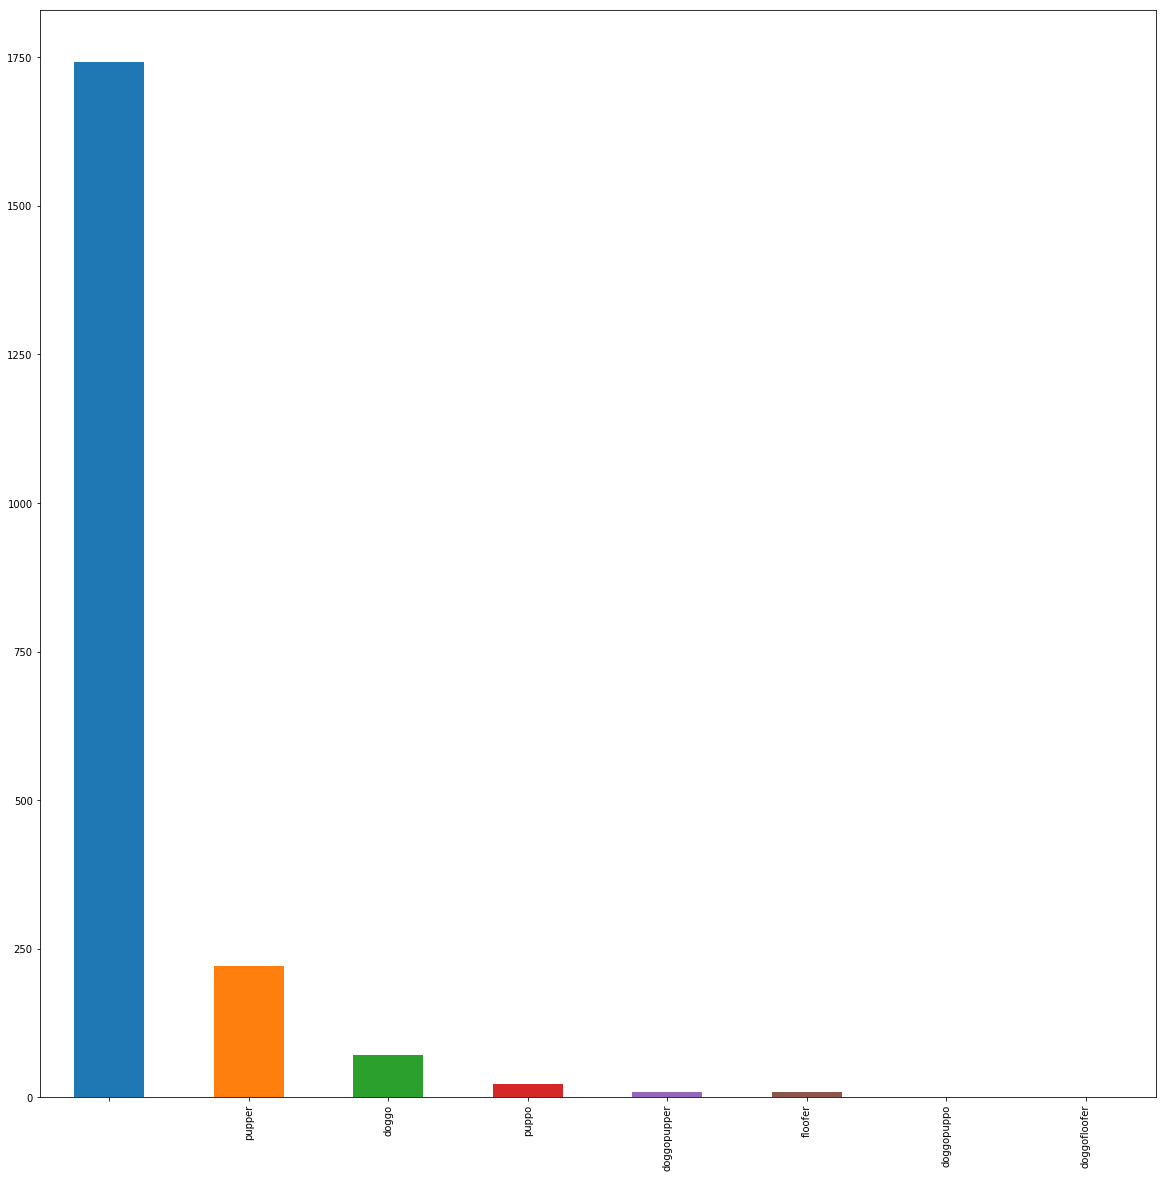

In [47]:
twitter_clean.Stage.value_counts().plot(kind='bar', figsize=(20,20))


> Pupper is the most popular dogs while floofer is the least popular, however majprity of the dogs did not have a stage specified.

In [48]:
stage_ratings = twitter_clean.groupby('Stage')['rating_numerator'].mean()

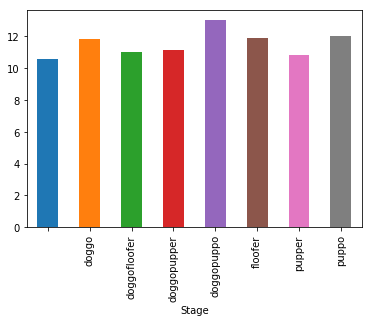

In [49]:
stage_ratings.plot(kind='bar')

> Doggo and puppo stages have the highest ratings

#### Ratings Distribution

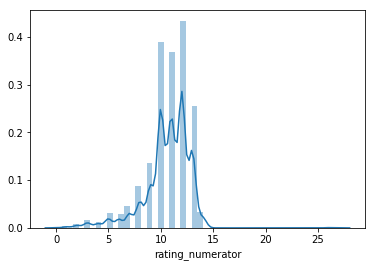

In [50]:
dist = twitter_clean[twitter_clean['rating_numerator']<=30].rating_numerator
sns.distplot(dist)

> Most dogs have a rating of 12

#### Retweets distributions

In [51]:
retweets = twitter_clean.groupby('Stage')['retweet_count'].agg('mean')
print(retweets)

Stage
                 2143.984438
doggo            5522.281690
doggofloofer     2795.000000
doggopupper      3577.111111
doggopuppo      16141.000000
floofer          3340.000000
pupper           2006.769231
puppo            5419.869565
Name: retweet_count, dtype: float64


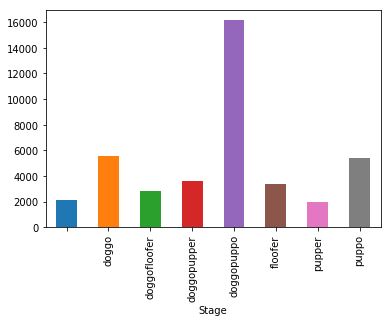

In [52]:
retweets.plot(kind='bar')

> Dogs between doggo and puppo stages are the most tweeted

In [53]:
pip install --upgrade --user nbconvert 


The following command must be run outside of the IPython shell:

    $ pip install --upgrade --user nbconvert 

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/
